In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pingouin as pg
from datetime import timedelta
%matplotlib inline

In [240]:
pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anton-zhuravlev/Lesson 5 Homework/5_data.csv.zip', compression='zip',  encoding='ISO-8859-1')
olist_customers_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anton-zhuravlev/! project/olist_customers_dataset.csv')
olist_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [241]:
olist_order_items_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anton-zhuravlev/! project/olist_order_items_dataset.csv')
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [243]:
olist_orders_dataset = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-anton-zhuravlev/! project/olist_orders_dataset.csv')
olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


## 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [168]:
# свожу таблицу уникальных идентификаторов пользователей с таблицей заказов
df_of_orders_and_users =  olist_customers_dataset.merge(olist_orders_dataset, how='inner', on=['customer_id'])
df_of_orders_and_users

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [169]:
df_of_orders_and_users.loc[df_of_orders_and_users['order_delivered_customer_date'].isnull()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,NaN,2018-05-24 00:00:00
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaN,2018-02-20 00:00:00
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaN,2018-02-09 00:00:00
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaN,2017-09-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99248,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaN,2018-08-02 00:00:00
99280,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,NaN,2018-05-23 00:00:00
99288,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,NaN,2017-03-17 00:00:00
99351,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaN,2018-03-01 00:00:00


In [170]:
# определяю общее количество заказов в группировке по статусам, заодно проверяю совпадет ли
# количество позаказных идентификаторов пользователя с уникальными идентификаторами заказа
df_of_orders_and_users.groupby('order_status', as_index=False)\
.agg({'customer_id': 'count', 'customer_unique_id': 'count', 'order_id': 'count'})\
.sort_values('customer_id', ascending=False)

,order_status,customer_id,customer_unique_id,order_id
3,delivered,96478,96478,96478
6,shipped,1107,1107,1107
1,canceled,625,625,625
7,unavailable,609,609,609
4,invoiced,314,314,314
5,processing,301,301,301
2,created,5,5,5
0,approved,2,2,2


Под покупкой понимается соблюдение двух условий: оплата товара и его последующая отгрузка конечному потребителю. Поэтому ставится два вопроса:
1. имеются ли отсутствующие значения в столбце с временем доставки заказа
2. имеются ли отсутствующие значения в столбце с временем подтверждения оплаты заказа

In [171]:
# проверяю количество отсутстующих значений в столбце времени доставки заказа
df_of_orders_and_users.order_delivered_customer_date.isna().sum()

2965

In [172]:
# общее количество  96476 = 99441 - 2965 говорит о том, что 2 заказа доставлялось со статусом 
# отличным от delivered
# 1.1 дополнительно нахожу к какому статусу относятся 2 доставленных заказа, фильтруя каждый статус
# заказа и сопоставляя количество отсутствующих значений (Nan) с общим количеством заказов в группе
df_of_orders_and_users.query('order_status == "delivered"').isna().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

Таким образом, несмотря на то, что заказ доставлен пользователю (delivered) в нем имеются
пропущенные значения времени доставки заказа (order_delivered_customer_date) в количестве 8 шт.,
14 заказов без подтвержденного времени оплаты заказа (order_approved_at) и 2 заказа с пропущенным
временем передачи заказа в логистическую службу (order_delivered_carrier_date). Что указывает на 
наличии ошибок в выгрузках.
Учитывая наличие ошибок в выгрузках, проверяю каждый статус и анализирую подробно
Посмотрим поподробнее на "мутации" статуса delivered:

In [173]:
# посмотрим на 8 заказов со статусом "доставлен пользователю" (delivered), но не заполненным
# временем доставки заказа (order_delivered_customer_date).
df_of_orders_and_users.query('order_status == "delivered"')\
.loc[df_of_orders_and_users['order_delivered_customer_date'].isnull()]
# указанная выборка говорит о том, что 8 пользователей оплатили заказ, но 
# в конечном счете его так и не получили, что не должно попадать под статус 
# "доставлен пользователю" (delivered). Надо срочно сообщить разработчикам :)
# Теоретически это вполне возможно. Предполагаю, что это программная ошибка выставленного статуса

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9034,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
12030,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00
13357,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
51668,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
85377,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
87172,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,e69f75a717d64fc5ecdfae42b2e8e086,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
89194,4f1d63d35fb7c8999853b2699f5c7649,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP,0d3268bad9b086af767785e3f0fc0133,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
97677,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00


In [174]:
df_of_orders_and_users.query('order_status == "delivered"')\
.loc[df_of_orders_and_users['order_approved_at'].isnull()]
# в указанной выборке видим, что 14 заказов не были оплачены, но доставлены. Мистика :)
# Нужно проверить оплату, скорее всего это баг системы, а может кто-то жульничает и получает бесплатно заказы :))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
8970,0bf35cac6cc7327065da879e2d90fae8,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP,d77031d6a3c8a52f019764e68f211c69,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
13890,1e101e0daffaddce8159d25a8e53f2b2,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,12a95a3c06dbaec84bcfb0e2da5d228a,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
20863,d5de688c321096d15508faae67a27051,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,7002a78c79c519ac54022d4f8a65e6e8,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
22703,07a2a7e0f63fd8cb757ed77d4245623c,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,51eb2eebd5d76a24625b31c33dd41449,delivered,2017-02-18 15:52:27,NaN,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00
27441,68d081753ad4fe22fc4d410a9eb1ca01,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP,d69e5d356402adc8cf17e08b5033acfb,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39286,d85919cb3c0529589c6fa617f5f43281,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,3c0b8706b065f9919d0505d3b3343881,delivered,2017-02-17 15:53:27,NaN,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23 00:00:00
41493,74bebaf46603f9340e3b50c6b086f992,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,2babbb4b15e6d2dfe95e2de765c97bce,delivered,2017-02-18 17:15:03,NaN,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31 00:00:00
44050,684cb238dc5b5d6366244e0e0776b450,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP,c1d4211b3dae76144deccd6c74144a88,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
52849,a3d3c38e58b9d2dfb9207cab690b6310,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,2eecb0d85f281280f79fa00f9cec1a95,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00
60039,2127dc6603ac33544953ef05ec155771,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP,e04abd8149ef81b95221e88f6ed9ab6a,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00


In [175]:
df_of_orders_and_users.query('order_status == "shipped"').isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64

Из указанной выборки видим, что все 1107 заказов, отгруженные со склада (shipped), 
проплачены, но не доставлены до пользователя. Значит, указанные заказы в выборку пользователей,
совершивших покупки не попадут

In [176]:
df_of_orders_and_users.query('order_status == "canceled"').isna().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

In [177]:
# Из указанной выборки видим, что не смотря на то, что 625 заказов отменено (canceled), 
# 141 - даже не оплачен,
# 550 - даже не переданы в логистическую службу, 
# 6 заказов были успешно доставлены пользователю.
# Таким образом, возникает вопрос - были ли указанные 6 заказов оплачены?
df_of_orders_and_users.query('order_status == "canceled"').dropna()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
27088,6c57e6119369185e575b36712766b0ef,59a7bb642795ddc85534fbd5f7360334,20091,rio de janeiro,RJ,770d331c84e5b214bd9dc70a10b829d0,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29 00:00:00
50569,1bccb206de9f0f25adc6871a1bcf77b2,6a04c8339c44b23e189446216a494569,32071,contagem,MG,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09 00:00:00
57499,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00
59705,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00
76291,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00
77039,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00


В результате анализа вышеуказанной выборки установлена аномалия в статусе заказов, а именно
6 заказов не соответствуют статусу canceled. Так как, 6 заказов были оплачены и успешно доставлены
пользователю, они попадают в выборку пользователей, совершивших покупки

In [178]:
df_of_orders_and_users.query('order_status == "unavailable"').isna().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

В указанной выборке видим, что из 609 заказов со статусом недоступен (unavailable), 609 были оплачены
но дальнейшего движения - передачи в логистическую службу и доставки - эти заказы не увидели.
Следовательно, указанные заказы не попадают в выборку пользователей, совершивших покупки.

In [179]:
df_of_orders_and_users.query('order_status == "invoiced"').isna().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

В указанной выборке видим, что из 314 заказов со статусом "выставлен счет" (invoiced) 
314 были оплачены
но дальнейшего движения - передачи в логистическую службу и доставки - эти заказы не увидели.
Следовательно, указанные заказы не попадают в выборку пользователей, совершивших покупки

In [180]:
df_of_orders_and_users.query('order_status == "processing"').isna().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

В указанной выборке видим, что из 301 заказа со статусом "в процессе сборки" (processing), 
301 был оплачен
но дальнейшего движения - передачи в логистическую службу и доставки - эти заказы не увидели.
Следовательно, указанные заказы не попадают в выборку пользователей, совершивших покупки

In [181]:
df_of_orders_and_users.query('order_status == "created"').isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
dtype: int64

В указанной выборке видим, что из 5 созданных заказов (created) 
5 не были оплачены и не передавались в логистическую службу

In [182]:
df_of_orders_and_users.query('order_status == "approved"').isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    2
order_estimated_delivery_date    0
dtype: int64

В указанной выборке видим, что из 2 подтвержденных заказов (approved) 
2 оплачены, но не передавались в логистическую службу и не отправлялись конечному пользователю

In [244]:
# Исходя из вышеизложенного, в выборку пользователей, совершивших покупку только один раз попадут
# 96456 = (96478 - 14 - 8) пользователей со статаусом "доставлен пользователю" (delivered)
df1 = df_of_orders_and_users.query('order_status == "delivered"')\
.loc[df_of_orders_and_users['order_approved_at'].notnull()]\
.loc[df_of_orders_and_users['order_delivered_customer_date'].notnull()]
# и 6 заказов со статусом canceled 
df2 = df_of_orders_and_users.query('order_status == "canceled"').dropna()

In [245]:
# склеиваем 2 датафрейма и получаем итоговый с количеством покупок
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
96457,1bccb206de9f0f25adc6871a1bcf77b2,6a04c8339c44b23e189446216a494569,32071,contagem,MG,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09 00:00:00
96458,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00
96459,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00
96460,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00


In [246]:
# делаю выборку с заданием условия о количестве покупок и получаю результат - 90543 пользователя,
# которые совершили покупки
df3.groupby('customer_unique_id', as_index=False)\
.agg({'order_id': 'count', 'customer_id': 'count'})\
.query('order_id == 1')\
.sort_values(['order_id', 'customer_id'], ascending=False)

,customer_unique_id,order_id,customer_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...,...
93338,fffcf5a5ff07b0908bd4e2dbc735a684,1,1
93339,fffea47cd6d3cc0a88bd621562a9d061,1,1
93340,ffff371b4d645b6ecea244b27531430a,1,1
93341,ffff5962728ec6157033ef9805bacc48,1,1


## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [186]:
df_of_orders_and_users.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [187]:
df_of_orders_and_users.groupby('order_status', as_index=False, dropna=False)\
.agg({'order_delivered_customer_date': 'count'})\
.sort_values('order_delivered_customer_date', ascending=False)

,order_status,order_delivered_customer_date
3,delivered,96470
1,canceled,6
0,approved,0
2,created,0
4,invoiced,0
5,processing,0
6,shipped,0
7,unavailable,0


In [188]:
df_orders_has_not_delivered = df_of_orders_and_users\
.loc[df_of_orders_and_users['order_delivered_customer_date'].isnull()]
df_orders_has_not_delivered

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,NaN,2018-05-24 00:00:00
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaN,2018-02-20 00:00:00
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaN,2018-02-09 00:00:00
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaN,2017-09-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99248,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaN,2018-08-02 00:00:00
99280,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,NaN,2018-05-23 00:00:00
99288,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,NaN,2017-03-17 00:00:00
99351,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaN,2018-03-01 00:00:00


In [189]:
# переводим столбец с датой создания заказа в формат даты
df_orders_has_not_delivered['order_purchase_timestamp'] = pd.to_datetime(df_orders_has_not_delivered['order_purchase_timestamp'])
df_orders_has_not_delivered.dtypes

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [190]:
df_orders_has_not_delivered["year_month"] = df_orders_has_not_delivered["order_purchase_timestamp"].dt.to_period("M")

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
df_orders_has_not_delivered

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00,2018-03
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,NaN,2018-05-24 00:00:00,2018-04
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaN,2018-02-20 00:00:00,2018-01
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaN,2018-02-09 00:00:00,2018-01
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaN,2017-09-11 00:00:00,2017-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99248,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaN,2018-08-02 00:00:00,2018-07
99280,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,NaN,2018-05-23 00:00:00,2018-04
99288,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,NaN,2017-03-17 00:00:00,2017-02
99351,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaN,2018-03-01 00:00:00,2018-01


In [192]:
df_orders_has_not_delivered = df_orders_has_not_delivered\
.groupby(['order_status' , 'year_month'], as_index=False)\
.agg({'order_id': 'count'})\
.sort_values( 'order_id', ascending=False)
df_orders_has_not_delivered

,order_status,year_month,order_id
89,shipped,2018-03,133
90,shipped,2018-04,99
107,unavailable,2017-11,84
23,canceled,2018-08,84
87,shipped,2018-01,74
...,...,...,...
30,delivered,2017-11,1
72,processing,2018-07,1
1,approved,2017-04,1
95,shipped,2018-09,1


In [193]:
df_orders_has_not_delivered\
.groupby('order_status', as_index=False)\
.agg({'order_id': 'mean'})\
.sort_values('order_id', ascending=False)\
.round(0)

,order_status,order_id
6,shipped,48.0
7,unavailable,29.0
1,canceled,26.0
5,processing,16.0
4,invoiced,15.0
3,delivered,2.0
2,created,2.0
0,approved,1.0


## 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [194]:
df3.order_purchase_timestamp = pd.to_datetime(df3.order_purchase_timestamp)

In [195]:
df4 = df3.merge(olist_order_items_dataset, how='inner', on=['order_id'])
df4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23
110177,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11
110178,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51
110179,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48


In [196]:
df4.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [197]:
df4.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
dtype: object

In [198]:
df4['day_name'] = df4['order_purchase_timestamp']. dt.day_name ()
df4

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23,Saturday
110177,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,Monday
110178,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51,Sunday
110179,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48,Sunday


In [199]:
df4[df4['product_id'] == '422879e10f46682990de24d770e7f83d']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_name
32,261cb4f92498ca05d5bd1a327a261d9c,424aca6872c5bab80780a8dec03b7516,12235,sao jose dos campos,SP,2904d3ae0064e840ffb4798ba4a12ae3,delivered,2017-09-12 08:00:03,2017-09-14 02:50:22,2017-09-19 19:27:49,2017-09-25 21:22:39,2017-10-05 00:00:00,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-09-20 02:50:22,59.9,13.44,Tuesday
234,ce330ffe33e3f344ad5a80b8410c1ced,4df9aee56fa602c72756abb22ee60b17,6764,taboao da serra,SP,053180cf4b0cf3f7a300e2e42ff01da9,delivered,2017-12-11 10:06:05,2017-12-11 10:18:28,2017-12-13 21:33:24,2017-12-27 14:53:40,2018-01-04 00:00:00,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-12-15 10:18:28,59.0,13.43,Monday
235,ce330ffe33e3f344ad5a80b8410c1ced,4df9aee56fa602c72756abb22ee60b17,6764,taboao da serra,SP,053180cf4b0cf3f7a300e2e42ff01da9,delivered,2017-12-11 10:06:05,2017-12-11 10:18:28,2017-12-13 21:33:24,2017-12-27 14:53:40,2018-01-04 00:00:00,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-12-15 10:18:28,59.0,13.43,Monday
704,55d125012ed8410157deac328f196288,2699b1bdee690329303fb2c0aada1c1b,87900,loanda,PR,74ba3677f15f456d0cf9f7081f3b1f30,delivered,2017-07-19 19:00:32,2017-07-19 19:10:12,2017-07-25 22:48:22,2017-07-31 17:27:57,2017-08-17 00:00:00,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-07-25 19:10:12,59.9,17.67,Wednesday
705,55d125012ed8410157deac328f196288,2699b1bdee690329303fb2c0aada1c1b,87900,loanda,PR,74ba3677f15f456d0cf9f7081f3b1f30,delivered,2017-07-19 19:00:32,2017-07-19 19:10:12,2017-07-25 22:48:22,2017-07-31 17:27:57,2017-08-17 00:00:00,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-07-25 19:10:12,59.9,17.67,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108466,928922804cd240fbd2f55e7687c0c412,52ed5a07cfa81a6802763aa0e29e4311,88337,balneario camboriu,SC,3837316347c6731a7368bd44a3b613bc,delivered,2017-09-29 00:00:57,2017-09-30 00:24:50,2017-10-04 19:41:27,2017-10-16 23:43:10,2017-10-25 00:00:00,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-10-05 00:24:50,59.9,17.67,Friday
108546,8714486eac2fe66523013485cac45f17,a05b42abd28b0e788776cc00acca82db,60416,fortaleza,CE,9e610f1799387c81ebe3841937df9098,delivered,2017-11-26 23:33:14,2017-11-26 23:53:18,2017-11-30 00:15:56,2017-12-15 21:04:44,2017-12-22 00:00:00,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 23:53:18,49.0,28.79,Sunday
109015,ba1592ad9a1c31b32f80c80bbdf039c1,0e3e01275a3d617393b91e4c1029e3dc,30240,belo horizonte,MG,ea3c8982e2aaa8f92872beb90375f41a,delivered,2017-07-18 16:55:02,2017-07-20 02:25:46,2017-07-24 20:13:35,2017-07-31 19:33:47,2017-08-16 00:00:00,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-07-26 02:25:46,59.9,17.67,Tuesday
109477,9156ed230c7216ef5f4eed2b0fae39ee,80b5c70d20058c553d662a56cbff22e5,13474,americana,SP,54232ca33e8e55a669a5f26927049f32,delivered,2017-11-26 21:48:38,2017-11-26 21:58:35,2017-11-29 23:29:14,2017-12-04 18:53:02,2017-12-15 00:00:00,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 21:58:35,49.0,13.41,Sunday


In [200]:
df5 = df4.groupby(['product_id', 'day_name'], as_index=False)\
.agg({'order_id': 'count'})\
.sort_values('order_id', ascending=False)
df5.rename(columns={'order_id':'count_orders'})
df5

,product_id,day_name,order_id
15592,422879e10f46682990de24d770e7f83d,Wednesday,93
35743,99a4788cb24856965c36a24e339b6058,Monday,91
40174,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
40175,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85
40170,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,83
...,...,...,...
23488,64187b994e1b15e6a59a6f72688fbea8,Thursday,1
23489,641a45900528e8324c4848dda4e0a3fa,Monday,1
23490,641a45900528e8324c4848dda4e0a3fa,Saturday,1
23491,641a45900528e8324c4848dda4e0a3fa,Sunday,1


In [201]:
df5.agg({'order_id': 'max'})

order_id    93
dtype: int64

In [202]:
df6 = df5\
.groupby('product_id', as_index=False)\
.agg({'order_id': 'max'})\
.sort_values('order_id', ascending=False)
df6.rename(columns={'order_id':'count_orders'})
df6

,product_id,order_id
8427,422879e10f46682990de24d770e7f83d,93
19287,99a4788cb24856965c36a24e339b6058,91
21613,aca2eb7d00ea1a7b8ebd4e68314663af,89
10613,53b36df67ebb7c41585e8d54d6772e08,76
7204,389d119b48cf3043d311335e499d9c6b,67
...,...,...
12467,62a5a3de0af802fb3718a83c74c3ff8d,1
12466,62a183c5f3895060ba1a8f1415694908,1
12465,62a068fa5b6d1cb8015c754504a10bfa,1
12462,629beb8e7317703dcc5f35b5463fd20e,1


In [203]:
df7 = df6.merge(df5, how='inner', on=['product_id', 'order_id'])
df7

,product_id,order_id,day_name
0,422879e10f46682990de24d770e7f83d,93,Wednesday
1,99a4788cb24856965c36a24e339b6058,91,Monday
2,aca2eb7d00ea1a7b8ebd4e68314663af,89,Thursday
3,53b36df67ebb7c41585e8d54d6772e08,76,Tuesday
4,389d119b48cf3043d311335e499d9c6b,67,Thursday
...,...,...,...
41762,62a183c5f3895060ba1a8f1415694908,1,Friday
41763,62a068fa5b6d1cb8015c754504a10bfa,1,Thursday
41764,629beb8e7317703dcc5f35b5463fd20e,1,Saturday
41765,629beb8e7317703dcc5f35b5463fd20e,1,Wednesday


In [204]:
df7.query('product_id == "629beb8e7317703dcc5f35b5463fd20e"')

,product_id,order_id,day_name
41764,629beb8e7317703dcc5f35b5463fd20e,1,Saturday
41765,629beb8e7317703dcc5f35b5463fd20e,1,Wednesday


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель.Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

In [205]:
full_df = df3.merge(olist_order_items_dataset, how='inner', on=['order_id']) # обновляем таблицу
full_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23
110177,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11
110178,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51
110179,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48


In [206]:
full_df.order_delivered_customer_date = pd.to_datetime(full_df.order_delivered_customer_date)
# переводим столбец с временем доставки заказа во временной формат

In [207]:
full_df['year_month'] = full_df['order_delivered_customer_date']\
.dt.to_period("M") # выделяем из столбца "времени доставки товара" месяц год
full_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23,2016-10
110177,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,2016-11
110178,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51,2016-11
110179,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48,2016-10


In [208]:
full_df['purchases_per_week'] = full_df.order_delivered_customer_date.dt.daysinmonth / 7 # делим столбец на количество дней в недели чтобы получить точное значение недели в месяце
full_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year_month,purchases_per_week
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01,4.428571
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06,4.285714
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03,4.428571
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08,4.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23,2016-10,4.428571
110177,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,2016-11,4.285714
110178,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51,2016-11,4.285714
110179,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48,2016-10,4.428571


Далее сгруппируем по уникальному идентификатору пользователя месяцу и количеству недель 
чтобы найти для них количество покупок на определенную дату. После чего количество покупок
на определенную дату разделим на сгруппированную колонку количества недель и вычислим среднее значение

In [209]:
probably_df = full_df.groupby(['customer_unique_id', 'year_month', 'purchases_per_week'], as_index=False)\
.agg({'order_id': 'count'})\
.sort_values('order_id', ascending=False)
probably_df['purchases_in_week'] = probably_df.order_id / probably_df.purchases_per_week
results = probably_df.groupby(['customer_unique_id', 'year_month'], as_index=False).agg({'purchases_in_week': 'mean'})
results = results.rename(columns={'purchases_in_week': 'avg_number_purchases'})
results

,customer_unique_id,year_month,avg_number_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-04,0.233333
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11,0.233333
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
...,...,...,...
95293,fffcf5a5ff07b0908bd4e2dbc735a684,2017-07,0.451613
95294,fffea47cd6d3cc0a88bd621562a9d061,2018-01,0.225806
95295,ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
95296,ffff5962728ec6157033ef9805bacc48,2018-05,0.225806


In [210]:
probably_df.nunique() # количество уникальных значений пользователей

customer_unique_id    93343
year_month               25
purchases_per_week        3
order_id                 19
purchases_in_week        40
dtype: int64

In [211]:
results[results.duplicated('customer_unique_id')] # количество повторяющихся значений пользователей

,customer_unique_id,year_month,avg_number_purchases
105,004288347e5e88a27ded2bb23747066c,2018-01,0.225806
406,011575986092c30523ecb71ff10cb473,2018-04,0.233333
422,011b4adcd54683b480c4d841250a987f,2018-02,0.500000
432,012452d40dafae4df401bced74cdb490,2018-05,0.225806
443,012a218df8995d3ec3bb221828360c86,2018-06,0.233333
...,...,...,...
94859,fed519569d16e690df6f89cb99d4e682,2018-04,0.233333
94928,ff03923ad1eb9e32304deb7f9b2a45c9,2018-06,0.233333
95023,ff44401d0d8f5b9c54a47374eb48c1b8,2017-06,0.233333
95126,ff8892f7c26aa0446da53d01b18df463,2018-01,0.225806


In [212]:
results.query('customer_unique_id == "011575986092c30523ecb71ff10cb473"')

,customer_unique_id,year_month,avg_number_purchases
405,011575986092c30523ecb71ff10cb473,2018-03,0.225806
406,011575986092c30523ecb71ff10cb473,2018-04,0.233333


У каждого пользователя может быть по несколько заказов в разные периоды. Выше показал пример 
такого пользователя

## 5.1. Выполните когортный анализ пользователей. 5.2. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц. Описание подхода можно найти тут. Для визуализации когортной таблицы рекомендуем использовать пример из 8-го урока python, раздел “Стильный урок”, степ 5. (15 баллов)

In [213]:
kohort_df = df3.merge(olist_order_items_dataset, how='inner', on=['order_id'])

In [214]:
kohort_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [215]:
kohort_df['order_delivered_customer_date'] = pd.to_datetime(kohort_df['order_delivered_customer_date'])
kohort_df['order_purchase_timestamp'] = pd.to_datetime(kohort_df['order_purchase_timestamp'])
kohort_df['order_delivered_carrier_date'] = pd.to_datetime(kohort_df['order_delivered_carrier_date'])
kohort_df['order_estimated_delivery_date'] = pd.to_datetime(kohort_df['order_estimated_delivery_date'])
kohort_df['shipping_limit_date'] = pd.to_datetime(kohort_df['shipping_limit_date'])

In [216]:
kohort_df['month_order'] = kohort_df['order_delivered_customer_date']\
.dt.to_period("M").astype(str)
kohort_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,month_order
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23,2016-10
110177,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,2016-11
110178,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51,2016-11
110179,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48,2016-10


Когортный анализ - это группировка пользователей по какому-то признаку. 
Чаще всего в системах аналитики пользователей группируют по дате рождения.
В нашем случае группировка будет по дате покупки пользователем.

In [217]:
df_dates_purchases = kohort_df.groupby('month_order', as_index=False)\
.agg({'customer_unique_id': 'count'})\
.sort_values('month_order')\
.rename(columns={'customer_unique_id': 'count_unique_users', 'month_order': 'purchases_date'})
df_dates_purchases

,purchases_date,count_unique_users
0,2016-10,245
1,2016-11,74
2,2016-12,4
3,2017-01,325
4,2017-02,1564
5,2017-03,2711
6,2017-04,2072
7,2017-05,4201
8,2017-06,3640
9,2017-07,3933


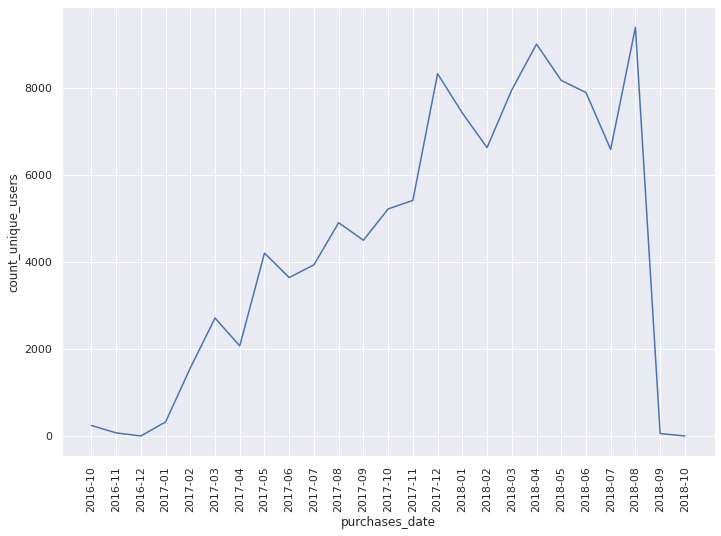

In [218]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(np.arange(len(df_dates_purchases)), df_dates_purchases['purchases_date'], rotation=90)
sns.lineplot(x='purchases_date', y='count_unique_users', data=df_dates_purchases)

Так как 2017 год наиболее полный, возьмем его для формирования когорт и 3 месяца 2018 года, 
чтобы сравнить

Формула для расчёта Retention Rate выглядит так: 
CRR = ([Суммарное количество клиентов на конец периода — Количество новых клиентов за период] 
       / Количество клиентов в начале периода) * 100%

Количество клиентов на начало периода и на конец период нам известно. 
Остается рассчитать количество новых клиентов за период

В прошлом задании установлено, что пользователи могут иметь по несколько покупок, значит
выявим дату первой покупки

In [219]:
df_of_first_purchases = kohort_df.groupby('customer_unique_id', as_index=False)\
.agg({'month_order': 'min'})\
.sort_values('month_order')\
.rename(columns={'month_order': 'first_purchases'})
df_of_first_purchases.head()

,customer_unique_id,first_purchases
63192,ad1cb06f09b27e4773870d1f76a68557,2016-10
32678,594fdb8a3914a91415413b3a467fa862,2016-10
10777,1d4e969b43ef0e67167ec4d418830125,2016-10
18038,31463a6b3a01f53c3ef1a04a849decf4,2016-10
65522,b3724b93edd00e472e1db7017236f60a,2016-10


Соединим наш получившийся датафрейм с общим чтобы взять колонку с покупками 
и сравнить с первой покупкой

In [220]:
intermidate_df = kohort_df.merge(df_of_first_purchases, on='customer_unique_id', how='inner')
intermidate_df = intermidate_df[['customer_unique_id', 'first_purchases', 'month_order']]
intermidate_df.head()

,customer_unique_id,first_purchases,month_order
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06,2018-06
3,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-08,2018-08


Теперь добавим еще один столбец - количество пользователей по месяцам

In [221]:
df_users_of_months = intermidate_df.groupby('first_purchases', as_index=False).agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id': 'count_users'})
intermidate_df2 = intermidate_df.merge(df_users_of_months, on='first_purchases', how='left')
intermidate_df2 = intermidate_df2.rename(columns={'customer_unique_id': 'users_id'})
intermidate_df2.head()

,users_id,first_purchases,month_order,count_users
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05,3673
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01,6401
2,060e732b5b29e8181a18229c7b0b2b5e,2018-06,2018-06,6565
3,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03,6564
4,345ecd01c38d18a9036ed96c73b8d066,2018-08,2018-08,8046


In [222]:
intermidate_df2.query('first_purchases == "2017-01"')

,users_id,first_purchases,month_order,count_users
868,fc19fe9ac733e36ff8227c29435c2030,2017-01,2017-01,262
869,fc19fe9ac733e36ff8227c29435c2030,2017-01,2018-06,262
1235,f75da962fb4ddac1569e90c21803c455,2017-01,2017-01,262
1338,e106b0bf1efc2352bda60eaeced76675,2017-01,2017-01,262
1339,e106b0bf1efc2352bda60eaeced76675,2017-01,2017-01,262
...,...,...,...,...
103452,3ed5e288eb859999092ba5da0c1b3128,2017-01,2017-01,262
103749,b9ac5718b8f3ff34b2929ac08661f82a,2017-01,2017-01,262
105117,2ad1ffd24d9373937ac6d1e376e4494d,2017-01,2017-01,262
105245,2c724eb337b9f040e3a65208e3280b8d,2017-01,2017-01,262


In [223]:
final_kohort_df = intermidate_df2.groupby(['first_purchases', 'month_order'], as_index=False)\
.agg({'users_id': 'nunique', 'count_users': 'max'})
final_kohort_df = final_kohort_df.query('"2016-12" < month_order < "2018-04"')
final_kohort_df.head()

,first_purchases,month_order,users_id,count_users
2,2016-10,2017-04,1,206
3,2016-10,2017-08,1,206
4,2016-10,2017-10,1,206
5,2016-10,2017-11,1,206
6,2016-10,2018-01,1,206


In [224]:
final_kohort_df['RR']=round(final_kohort_df.users_id/final_kohort_df.count_users*100, 2)
final_kohort_df

,first_purchases,month_order,users_id,count_users,RR
2,2016-10,2017-04,1,206,0.49
3,2016-10,2017-08,1,206,0.49
4,2016-10,2017-10,1,206,0.49
5,2016-10,2017-11,1,206,0.49
6,2016-10,2018-01,1,206,0.49
...,...,...,...,...,...
181,2018-01,2018-02,28,6401,0.44
182,2018-01,2018-03,17,6401,0.27
188,2018-02,2018-02,5648,5648,100.00
189,2018-02,2018-03,37,5648,0.66


In [225]:
def cohort_period(date):
    period=0
    sp=date.split('-')
    if sp[0]=="2017":
        period=int(sp[1])
    else:
        period=int(sp[1])+12
    return(period)

final_kohort_df['cohort_period'] = final_kohort_df.month_order.apply(cohort_period)

final_kohort_df.head(3)

,first_purchases,month_order,users_id,count_users,RR,cohort_period
2,2016-10,2017-04,1,206,0.49,4
3,2016-10,2017-08,1,206,0.49,8
4,2016-10,2017-10,1,206,0.49,10


In [226]:
final_kohort_df.set_index(['first_purchases', 'cohort_period'], inplace=True)

In [227]:
table = final_kohort_df['RR'].unstack(1)
table

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
first_purchases,,,,,,,,,,,,,,,
2016-10,NaN,NaN,NaN,0.49,NaN,NaN,NaN,0.49,NaN,0.49,0.49,NaN,0.49,NaN,0.49
2016-12,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,1.15,0.38,NaN,0.38,0.38,0.38,0.38,NaN,NaN,0.38,0.76,1.15,NaN,0.38
2017-02,NaN,100.00,0.68,0.23,0.30,0.30,0.15,0.15,0.23,0.08,0.08,0.15,0.38,0.23,0.15
2017-03,NaN,NaN,100.00,0.56,0.30,0.43,0.30,0.09,0.30,0.26,0.26,0.21,0.26,0.04,0.04
2017-04,NaN,NaN,NaN,100.00,0.78,0.28,0.22,0.28,0.17,0.28,0.06,0.39,0.22,0.28,0.11
2017-05,NaN,NaN,NaN,NaN,100.00,0.74,0.33,0.16,0.35,0.38,0.25,0.35,0.22,0.22,0.25
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.70,0.58,0.45,0.35,0.26,0.38,0.19,0.19,0.22
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.66,0.18,0.42,0.27,0.27,0.39,0.27,0.21


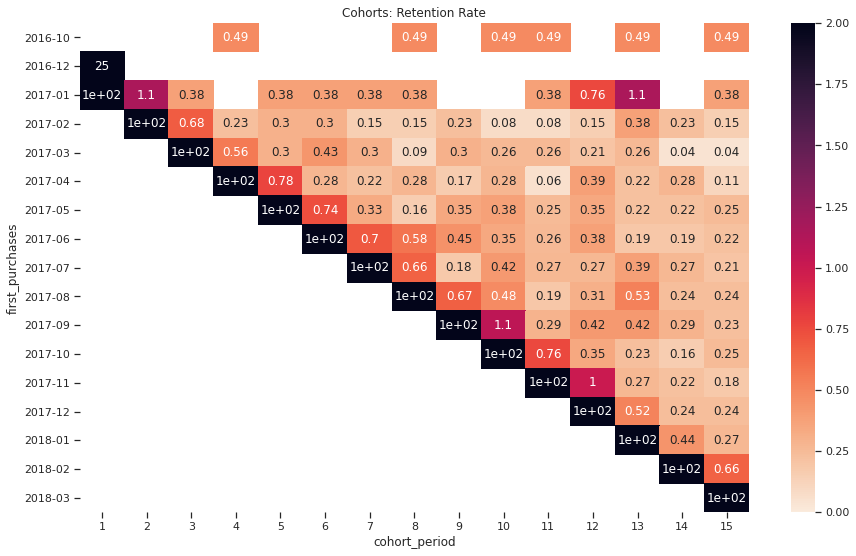

In [228]:
cmap = sns.cm.rocket_r
sns.set(style='ticks')
plt.figure(figsize=(15, 9))
plt.xlabel('Cohorts')
plt.title('Cohorts: Retention Rate')
sns.heatmap(table, annot=True, cmap=cmap, vmin=0, vmax=2, center= 1)

Таким образом, когорта покупателей, совершивших покупки в сентябре имеет наивысший RR

## 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. (23 балла)

In [463]:
rfm_df = df3.merge(olist_order_items_dataset, how='inner', on=['order_id'])
rfm_df['price'] = rfm_df['price'].astype(int)
rfm_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99,11.23
110177,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21,14.11
110178,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135,18.51
110179,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59,0.48


Найдем сумму заказов для каждого клиента, создав дополнительную колонку в найшей общей таблице

In [464]:
df_of_sales = rfm_df.groupby('order_id', as_index=False)\
.agg({'price': 'sum'}).rename(columns={'price': 'sales'})
df_of_sales

,order_id,sales
0,00010242fe8c5a6d1ba2dd792cb16214,58
1,00018f77f2f0320c557190d7a144bdd3,239
2,000229ec398224ef6ca0657da4fc703e,199
3,00024acbcdf0a6daa1e931b038114c75,12
4,00042b26cf59d7ce69dfabb4e55b4fd9,199
...,...,...
96457,fffc94f6ce00a00581880bf54a75a037,299
96458,fffcd46ef2263f404302a634eb57f7eb,350
96459,fffce4705a9662cd70adb13d4a31832d,99
96460,fffe18544ffabc95dfada21779c9644f,55


In [465]:
rfm_df = rfm_df.merge(df_of_sales, how='inner', on='order_id')

In [466]:
rfm_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,sales
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124,21.88,124
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289,46.48,289
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139,17.79,139
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149,23.36,149
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230,22.25,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110176,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99,11.23,99
110177,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21,14.11,21
110178,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135,18.51,135
110179,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59,0.48,108


Получили таблицу с колонкой общей суммы заказов для каждого клиента (sales). Дальше преобразовываем, сгруппировав по айди пользователя, уникальному идентификатору заказа, дате доставки заказа и просуммировав для каждого заказа сумму заказа

In [467]:
rfm_df2 = rfm_df.groupby(['customer_unique_id', 'order_id', 'order_delivered_customer_date'], as_index=False)\
.agg({'sales': 'sum'})
rfm_df2

,customer_unique_id,order_id,order_delivered_customer_date,sales
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-16 20:48:37,129
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-10 18:02:42,18
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-04-05 14:38:47,69
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-11-01 21:23:05,25
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-27 23:08:56,180
...,...,...,...,...
96457,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-07-06 09:22:00,3140
96458,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2018-01-09 22:28:20,64
96459,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-22 12:45:04,89
96460,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-14 11:54:26,115


In [468]:
rfm_df2['order_delivered_customer_date'] = pd.to_datetime(rfm_df2['order_delivered_customer_date'])

In [469]:
rfm_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96462 entries, 0 to 96461
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             96462 non-null  object        
 1   order_id                       96462 non-null  object        
 2   order_delivered_customer_date  96462 non-null  datetime64[ns]
 3   sales                          96462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.7+ MB


In [470]:
rfm_df2.order_delivered_customer_date.min()

Timestamp('2016-10-11 13:46:32')

In [471]:
rfm_df.order_delivered_customer_date.max() # определяем последнюю дату покупки для индекса recency

'2018-10-17 13:22:46'

Создаем таблицу с RFM-показателями

In [472]:
import datetime as dt
NOW = dt.datetime(2018,10,17)
RFM_table = rfm_df2.groupby('customer_unique_id').agg({'order_delivered_customer_date': lambda x: (NOW - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'sales': lambda x: x.sum()}, as_index=False)    # Monetary 
RFM_table.rename(columns={'order_delivered_customer_date': 'recency', 
                         'order_id': 'frequency',
                         'sales': 'monetary_value'}, inplace=True)
RFM_table

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,153,1,129
0000b849f77a49e4a4ce2b2a4ca5be3f,159,1,18
0000f46a3911fa3c0805444483337064,559,1,69
0000f6ccb0745a6a4b88665a16c9f078,349,1,25
0004aac84e0df4da2b147fca70cf8255,323,1,180
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,467,1,3140
fffea47cd6d3cc0a88bd621562a9d061,280,1,64
ffff371b4d645b6ecea244b27531430a,601,1,89


In [473]:
RFM_table.describe()

,recency,frequency,monetary_value
count,93343.000000,93343.000000,93343.000000
mean,272.938646,1.033414,178.644108
std,151.881686,0.209090,585.718954
min,-1.000000,1.000000,0.000000
25%,152.000000,1.000000,48.000000
50%,252.000000,1.000000,90.000000
75%,382.000000,1.000000,170.000000
max,735.000000,15.000000,107520.000000


Дискрайб показывает, что у нас очень большая разница между минимальным и максимальным колличество РФМ показателей

In [440]:
RFM_table.frequency.min()

1

In [441]:
RFM_table.frequency.max()

15

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


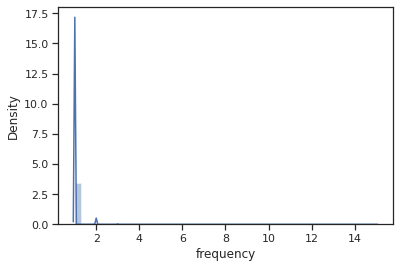

In [442]:
sns.distplot(RFM_table.frequency)

In [443]:
RFM_table.query('frequency == "15"') # вероятнее всего это выброс

,recency,frequency,monetary_value
customer_unique_id,,,
8d50f5eadf50201ccdcedfb9e2ac8455,53,15,702


In [444]:
RFM_table.recency.min()

-1

In [445]:
RFM_table.recency.max()

735

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


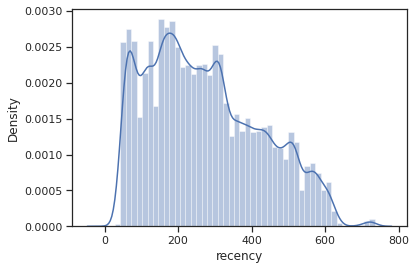

In [446]:
sns.distplot(RFM_table.recency)

In [447]:
RFM_table.monetary_value.min()

0

In [481]:
RFM_table.monetary_value.max()

107520

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


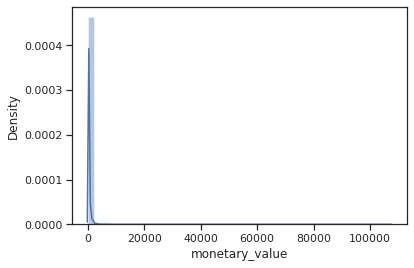

In [449]:
sns.distplot(RFM_table.monetary_value)

In [450]:
quintiles = RFM_table[['recency', 'frequency', 'monetary_value']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 127.0, 0.4: 207.0, 0.6: 299.0, 0.8: 418.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary_value': {0.2: 39.0, 0.4: 69.0, 0.6: 117.0, 0.8: 199.0}}

In [474]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [475]:
RFM_table['R'] = RFM_table['recency'].apply(lambda x: r_score(x))
RFM_table['F'] = RFM_table['frequency'].apply(lambda x: fm_score(x, 'frequency'))
RFM_table['M'] = RFM_table['monetary_value'].apply(lambda x: fm_score(x, 'monetary_value'))

In [476]:
RFM_table['RFM_Score'] = RFM_table['R'].map(str) + RFM_table['F'].map(str) + RFM_table['M'].map(str)
RFM_table

,recency,frequency,monetary_value,R,F,M,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,153,1,129,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,159,1,18,4,1,1,411
0000f46a3911fa3c0805444483337064,559,1,69,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,349,1,25,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,323,1,180,2,1,4,214
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,467,1,3140,1,1,5,115
fffea47cd6d3cc0a88bd621562a9d061,280,1,64,3,1,2,312
ffff371b4d645b6ecea244b27531430a,601,1,89,1,1,3,113


In [477]:
RFM_table.query('F == "3"').sort_values('monetary_value', ascending=False)

,recency,frequency,monetary_value,R,F,M,RFM_Score
customer_unique_id,,,,,,,


In [478]:
segt_map = {
    r'[1-2][1-2]': 'бездействующие',
    r'[1-2][3-4]': 'рисковые',
    r'[1-2]5': 'не_могу_потерять',
    r'3[1-2]': 'собираются_спать',
    r'33': 'нуждается_во_внимании',
    r'[3-4][4-5]': 'постоянные_клиенты',
    r'41': 'многообещающие',
    r'51': 'новые_клиенты',
    r'[4-5][2-3]': 'потенциально_лояльные',
    r'5[4-5]': 'чемпионы'
}

RFM_table['Segment'] = RFM_Segment['R'].map(str) + RFM_Segment['F'].map(str)
RFM_table['Segment'] = RFM_Segment['Segment'].replace(segt_map, regex=True)
RFM_table.head()

,recency,frequency,monetary_value,R,F,M,RFM_Score,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,153,1,129,4,1,4,414,собираются_спать
0000b849f77a49e4a4ce2b2a4ca5be3f,159,1,18,4,1,1,411,собираются_спать
0000f46a3911fa3c0805444483337064,559,1,69,1,1,2,112,бездействующие
0000f6ccb0745a6a4b88665a16c9f078,349,1,25,2,1,1,211,бездействующие
0004aac84e0df4da2b147fca70cf8255,323,1,180,2,1,4,214,бездействующие


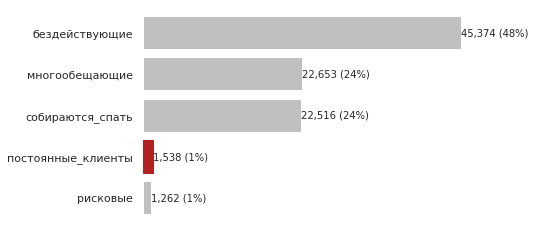

In [479]:
# count the number of customers in each segment
segments_counts = RFM_Segment['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['чемпионы', 'постоянные_клиенты']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

На данном этапе разделил на сегменты по квантилям.